# Demo of `FastSampler` class

In [129]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [130]:
import time
from IPython.display import display

import numpy as np

from battleship.fast_sampler import FastSampler
from battleship.board import Board

In [131]:
SHIP_LENGTHS = range(2, 6)
SHIP_LABELS = ["R", "G", "P", "O"]

# Individual samples

## Starting from empty board

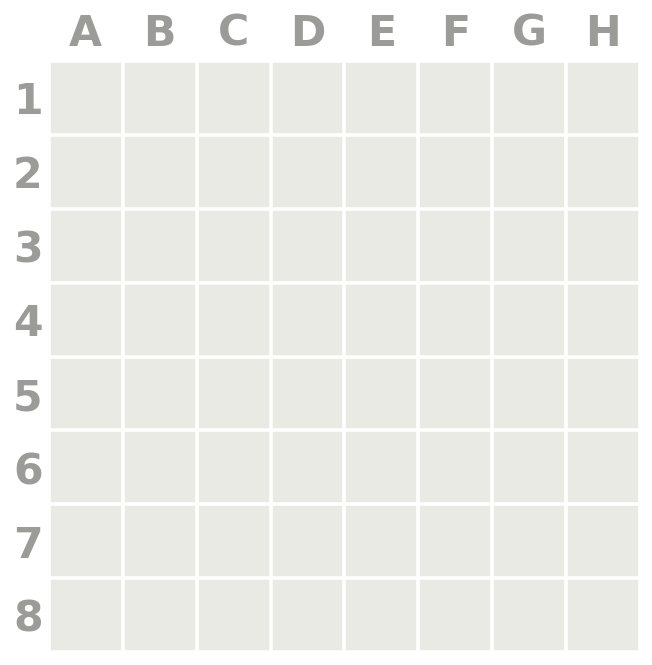

In [132]:
BOARD_EMPTY = Board(np.full((8, 8), -1))
BOARD_EMPTY

In [133]:
sampler = FastSampler(board=BOARD_EMPTY, ship_lengths=SHIP_LENGTHS, ship_labels=SHIP_LABELS)

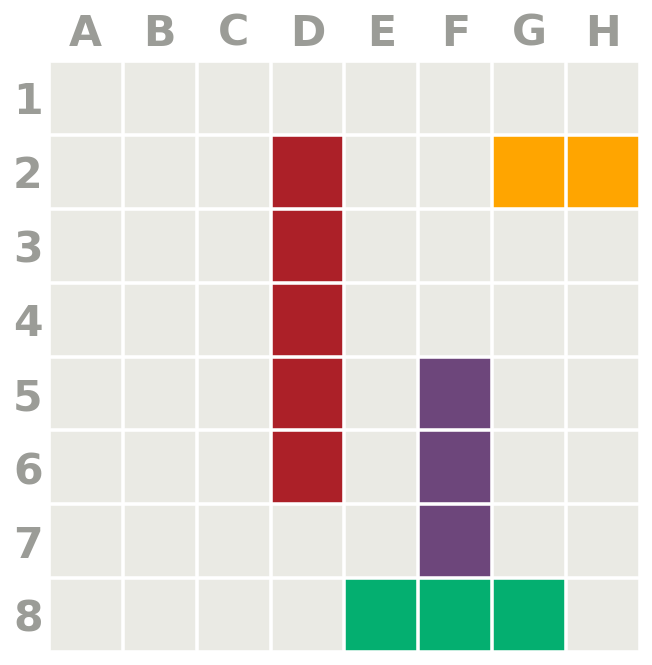

In [134]:
sampler.populate_board()

## Starting from board with some water tiles

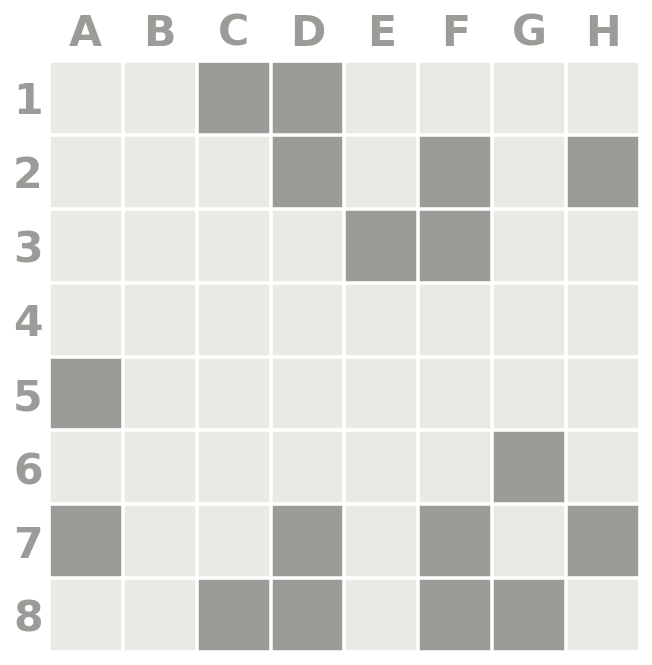

In [135]:
# Randomly set some tiles to 0
rng = np.random.default_rng(0)

SHIP_LENGTHS = range(2, 6)
BOARD_WATER = Board(rng.choice([0, -1], size=(8, 8), p=[0.25, 0.75]))
BOARD_WATER

In [136]:
sampler = FastSampler(board=BOARD_WATER, ship_lengths=SHIP_LENGTHS, ship_labels=SHIP_LABELS)

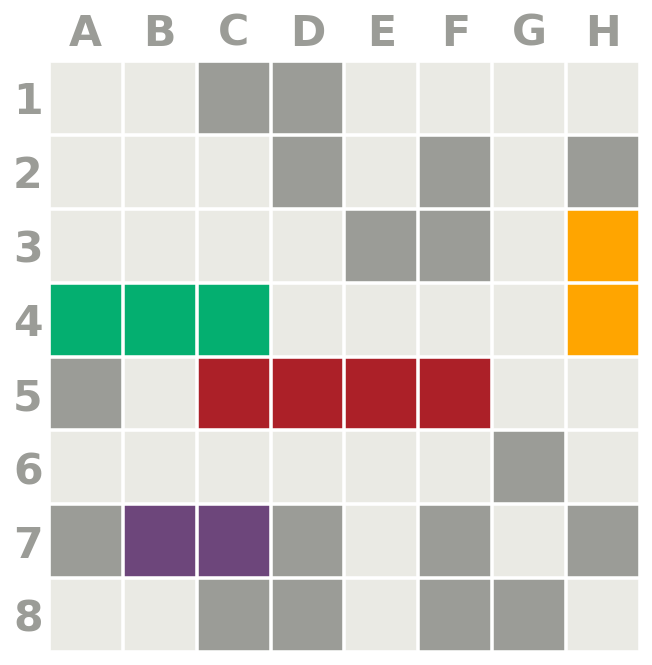

In [137]:
sampler.populate_board()

## Starting from board with some water tiles and ships

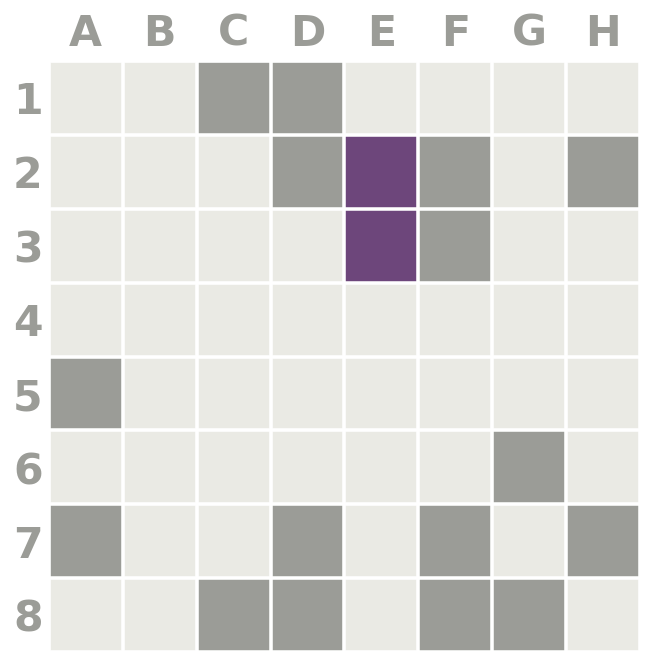

In [138]:
# Randomly set some tiles to 0
rng = np.random.default_rng(0)

SHIP_LENGTHS = range(2, 6)
BOARD_WATER_SHIP = Board(rng.choice([0, -1], size=(8, 8), p=[0.25, 0.75]))
BOARD_WATER_SHIP.board[1:3, 4] = 3
BOARD_WATER_SHIP

In [139]:
sampler = FastSampler(board=BOARD_WATER_SHIP, ship_lengths=SHIP_LENGTHS, ship_labels=SHIP_LABELS)

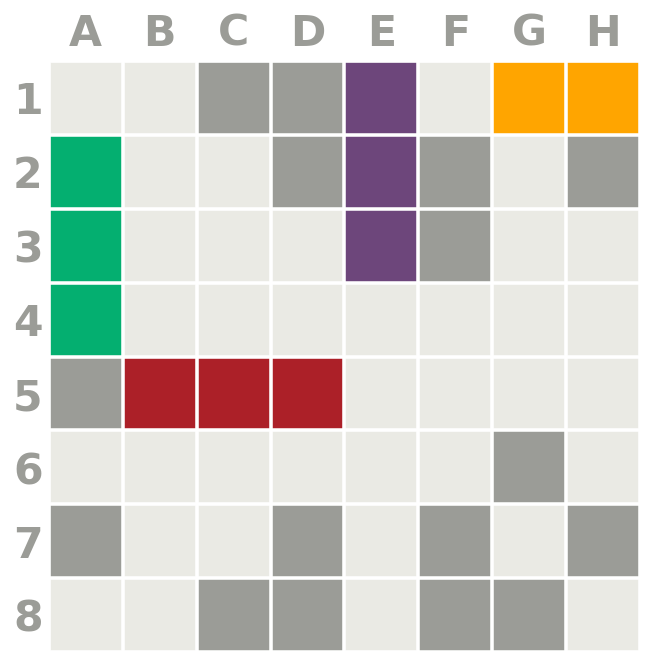

In [140]:
new_board = sampler.populate_board()
new_board

# Benchmarking

In [141]:
N = 1000
SHIP_LENGTHS = range(2, 6)

# sampler = FastSampler(board=BOARD_EMPTY, ship_lengths=SHIP_LENGTHS, ship_labels=SHIP_LABELS)
# sampler = FastSampler(board=BOARD_WATER, ship_lengths=SHIP_LENGTHS, ship_labels=SHIP_LABELS)
sampler = FastSampler(board=BOARD_WATER_SHIP, ship_lengths=SHIP_LENGTHS, ship_labels=SHIP_LABELS)

start = time.time()

sampled_boards = []
for i in range(N):
    sampled_boards.append(sampler.populate_board())

print(f"Sampled {N} boards in {time.time() - start:.4f} seconds")
n_valid = len([b for b in sampled_boards if b is not None])
print(f"{n_valid} / {N} boards ({n_valid / N:.2f}%) are valid")

Sampled 1000 boards in 0.0599 seconds
1000 / 1000 boards (1.00%) are valid


In [142]:
(sampled_boards[0].board > 0).astype(int)

array([[0, 0, 0, 0, 1, 0, 1, 1],
       [1, 0, 0, 0, 1, 0, 0, 0],
       [1, 0, 0, 0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0]])

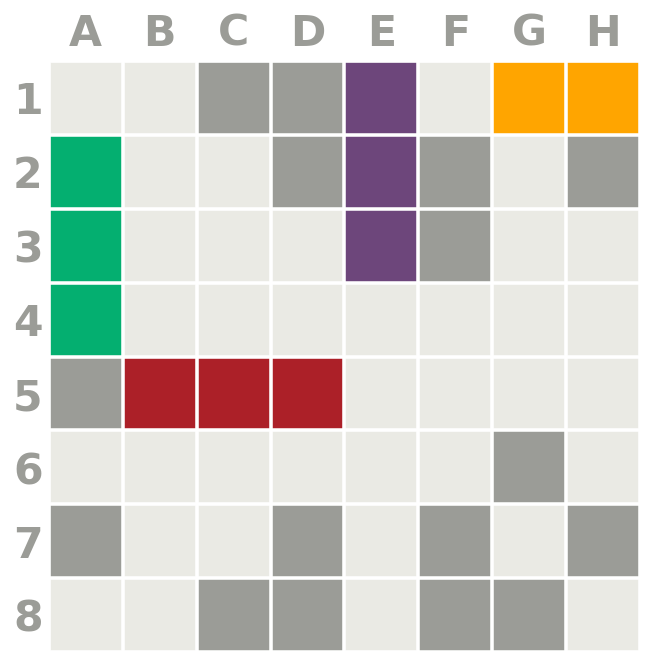

In [143]:
sampled_boards[0]

# Heatmaps

In [144]:
sampler = FastSampler(
    board=BOARD_WATER_SHIP, ship_lengths=SHIP_LENGTHS, ship_labels=SHIP_LABELS
)

posterior = sampler.compute_posterior(n_samples=1000)

In [145]:
posterior

array([[0.116, 0.133, 0.   , 0.   , 0.479, 0.103, 0.222, 0.074],
       [0.2  , 0.256, 0.161, 0.   , 1.   , 0.   , 0.168, 0.   ],
       [0.21 , 0.333, 0.294, 0.151, 1.   , 0.   , 0.22 , 0.098],
       [0.131, 0.377, 0.362, 0.22 , 0.794, 0.124, 0.256, 0.189],
       [0.   , 0.344, 0.36 , 0.248, 0.613, 0.243, 0.241, 0.209],
       [0.09 , 0.396, 0.39 , 0.259, 0.35 , 0.135, 0.   , 0.081],
       [0.   , 0.184, 0.127, 0.   , 0.081, 0.   , 0.   , 0.   ],
       [0.032, 0.123, 0.   , 0.   , 0.044, 0.   , 0.   , 0.   ]])

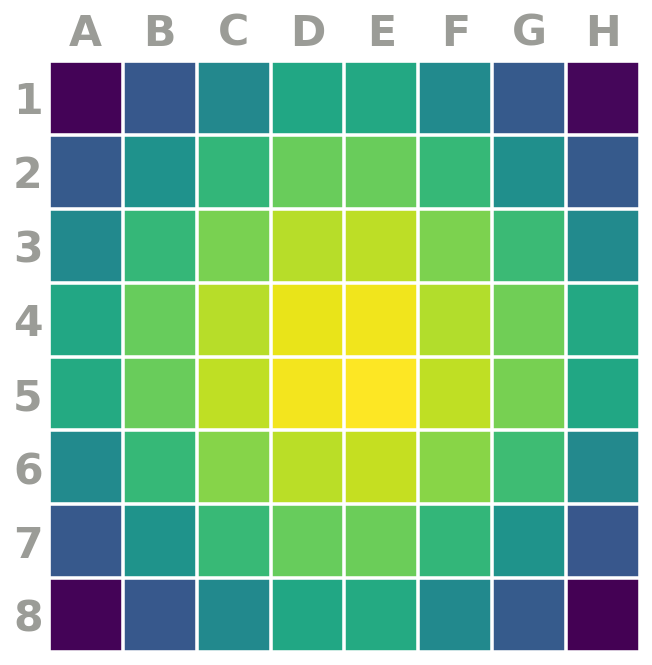

In [149]:
BOARD = BOARD_EMPTY
SHIP_LENGTHS = range(2, 6)
SHIP_LABELS = ["R", "G", "P", "O"]
# SHIP_LABELS = ["P", "G", "R", "O"]

sampler = FastSampler(
    board=BOARD, ship_lengths=SHIP_LENGTHS, ship_labels=SHIP_LABELS
)

sampler.heatmap(n_samples=100000)